In [1]:
import tensorflow as tf

from tensorflow import keras

# Load MNIST data

In [31]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [32]:
X_train_full.shape[0], X_test.shape[0] # we have 60k training instances & 10k test instances

(60000, 10000)

In [33]:
X_train_full[0].min(), X_train_full[0].max() # the individual pixel values range from 0 to 255; we'll want to scale these to between 0 & 1

(0, 255)

## Create validation set & scale pixel values

In [34]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0

In [35]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [36]:
X_test = X_test/255.0

In [39]:
y_valid # labels are simple integer values

array([5, 0, 4, ..., 2, 1, 2], dtype=uint8)

In [61]:
y_train = y_train*1.0
y_valid = y_valid*1.0
y_test = y_test*1.0

We now have the following datasets:

> X_train, y_train
    
> X_valid, y_valid
    
> X_test, y_test

# Build model

In [71]:
model = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dense(300, activation='softmax'),
    ]
)

In [73]:
model.compile(
#     loss= 'SparseCategoricalCrossentropy',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # loss when labels are integers
    optimizer='sgd',
    metrics=['accuracy']
)

In [74]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True
)

In [80]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb]
)

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0297 - accuracy: 0.9932 - val_loss: 0.0699 - val_accuracy: 0.9782
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0282 - accuracy: 0.9936 - val_loss: 0.0679 - val_accuracy: 0.9802
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0265 - accuracy: 0.9941 - val_loss: 0.0677 - val_accuracy: 0.9788
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0251 - accuracy: 0.9945 - val_loss: 0.0674 - val_accuracy: 0.9792
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0238 - accuracy: 0.9950 - val_loss: 0.0682 - val_accuracy: 0.9794
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0224 - accuracy: 0.9956 - val_loss: 0.0666 - val_accuracy: 0.9786
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0214 - accuracy: 0.9957 - val_loss: 0.0672 - val_accuracy:

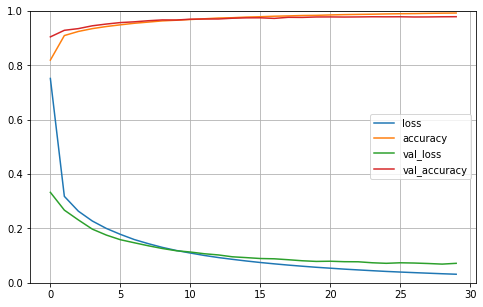

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [79]:
model.evaluate(X_test, y_test);

313/313 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.9768


In [78]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [70]:
y_pred = model.predict_classes(X_new)
y_pred

array([7, 2, 1])